In [4]:
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("youtube.csv.csv")

In [6]:
print("===== DATA HEAD =====")
display(df.head())

===== DATA HEAD =====


,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13-11-2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13-11-2017,7:00 to 7:59,Monday,US,last week tonight trump presidency|last week t...,2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12-11-2017,19:00 to 19:59,Sunday,US,racist superman|rudy|mancuso|king|bach|racist|...,3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13-11-2017,11:00 to 11:59,Monday,US,rhett and link|gmm|good mythical morning|rhett...,343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12-11-2017,18:00 to 18:59,Sunday,US,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,2095731,132235,1989,17518,False,False,False


In [7]:
print("===== DATA INFO =====")
print(df.info())
print("===== NULL VALUES =====")
print(df.isnull().sum())


===== DATA INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count 

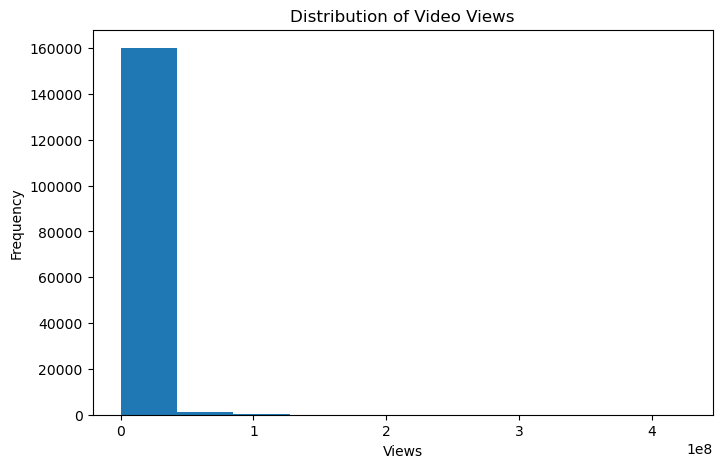

In [8]:
plt.figure(figsize=(8,5))
df['views'].plot(kind='hist')
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.title("Distribution of Video Views")
plt.show()

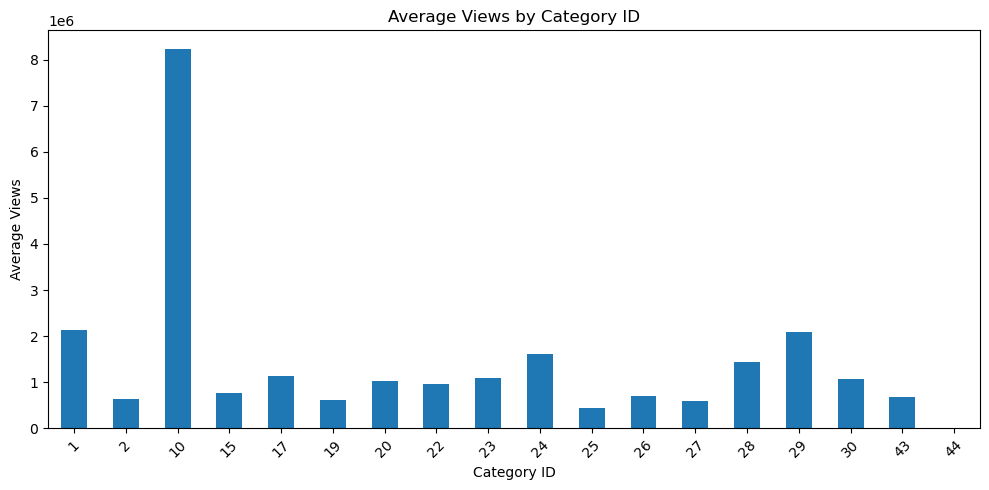

In [9]:
plt.figure(figsize=(10,5))
df.groupby('category_id')['views'].mean().plot(kind='bar')

plt.title("Average Views by Category ID")
plt.xlabel("Category ID")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

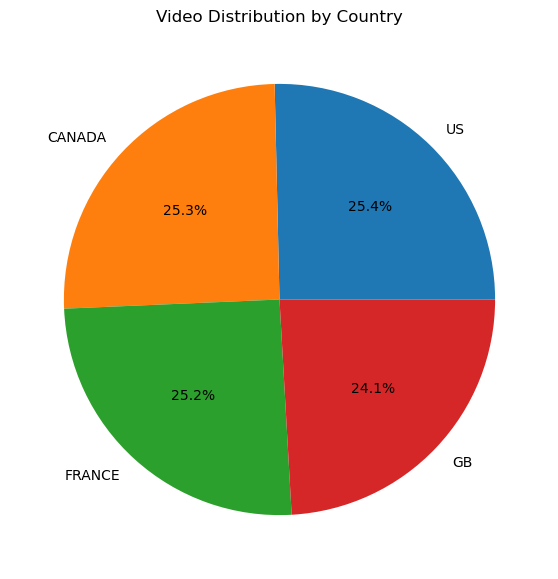

In [10]:
plt.figure(figsize=(7,7))
df['publish_country'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title("Video Distribution by Country")
plt.ylabel("")  # Removes extra label
plt.show()

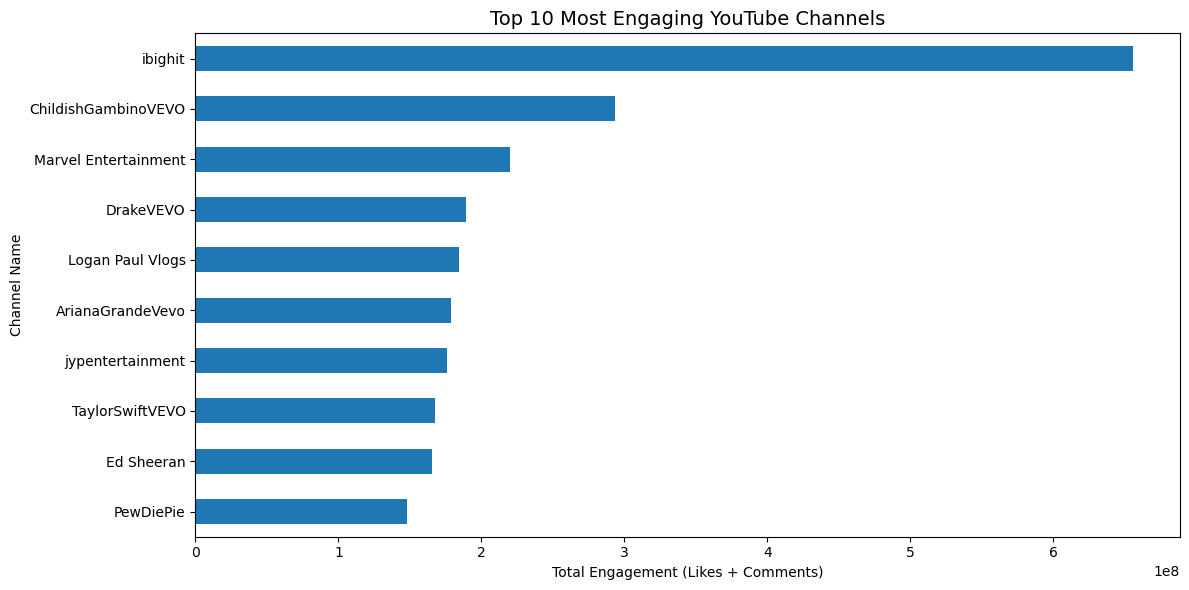

In [11]:
# Create Engagement Score
df['engagement_score'] = df['likes'] + df['comment_count']

# Top 10 channels by engagement
top_channels = (
    df.groupby('channel_title')['engagement_score']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12,6))
top_channels.plot(kind='barh')

plt.title("Top 10 Most Engaging YouTube Channels", fontsize=14)
plt.xlabel("Total Engagement (Likes + Comments)")
plt.ylabel("Channel Name")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()